<a href="https://colab.research.google.com/github/bilaslsa/Information-Retrieval/blob/main/Praktikum1/Praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
import pandas as pd

df = pd.read_xml('/content/gdrive/MyDrive/Information Retrival/kompas-beritaPart1.xml')
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [38]:
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
def caseFolding(text):
    text = text.lower()
    return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
case folded: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


In [41]:
import re

def punctuationRemoval(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
punctuation removed: Terima kasih  Kak  Kamu sangat baik sekali kepadaku hari ini 


In [42]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompas com ponsel android huawei hon...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompas com sejak 2013 wacana tenta...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompas com danis darusman pelanggan ...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompas com salah satu momok yang dihadapi dala...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompas com resmi diperkenalkan pada...


In [43]:
def tokenize(text):
    tokens = text.split(" ")
    tokens = [token for token in tokens if token]
    return tokens

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


In [44]:
df['tokens'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompas com ponsel android huawei hon...,"[jakarta, kompas, com, ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompas com sejak 2013 wacana tenta...,"[jakarta, kompas, com, sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompas com danis darusman pelanggan ...,"[jakarta, kompas, com, danis, darusman, pelang..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompas com salah satu momok yang dihadapi dala...,"[kompas, com, salah, satu, momok, yang, dihada..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompas com resmi diperkenalkan pada...,"[jakarta, kompas, com, resmi, diperkenalkan, p..."


In [45]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
    for token in tokens:
        all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head(10)

,term,freq
135,yang,6473
10,di,5885
128,dan,4926
40,ini,2844
25,dengan,2659
33,untuk,2626
20,itu,2513
35,dari,2494
98,akan,2061
109,dalam,1797


In [46]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
135,yang,6473,1
10,di,5885,2
128,dan,4926,3
40,ini,2844,4
25,dengan,2659,5


In [47]:
term_freq_df['Rank'] = term_freq_df['freq'].rank(method='first', ascending=False).astype(int)
tf_sorted_rank = term_freq_df.sort_values(by='Rank', ascending=True)
tf_sorted_rank.head(10)

,term,freq,Rank
135,yang,6473,1
10,di,5885,2
128,dan,4926,3
40,ini,2844,4
25,dengan,2659,5
33,untuk,2626,6
20,itu,2513,7
35,dari,2494,8
98,akan,2061,9
109,dalam,1797,10


In [48]:
print('10 term frekuensi terendah')
term_freq_df_sorted.tail(10)

10 term frekuensi terendah


,term,freq,rank
19971,trade,1,20000
19969,nirlaba,1,20001
19968,merakyat,1,20002
7369,bhineka,1,20003
7366,berkiprah,1,20004
19998,permata,1,20005
19996,booming,1,20006
19991,nyengat,1,20007
19990,dicampurkan,1,20008
19989,dihaluskan,1,20009


In [49]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=100)

,term,freq,rank,k = f * r
135,yang,6473,1,6473
10,di,5885,2,11770
128,dan,4926,3,14778
40,ini,2844,4,11376
25,dengan,2659,5,13295
...,...,...,...,...
232,secara,381,96,36576
53,pun,376,97,36472
3622,lanud,373,98,36554
440,jika,372,99,36828


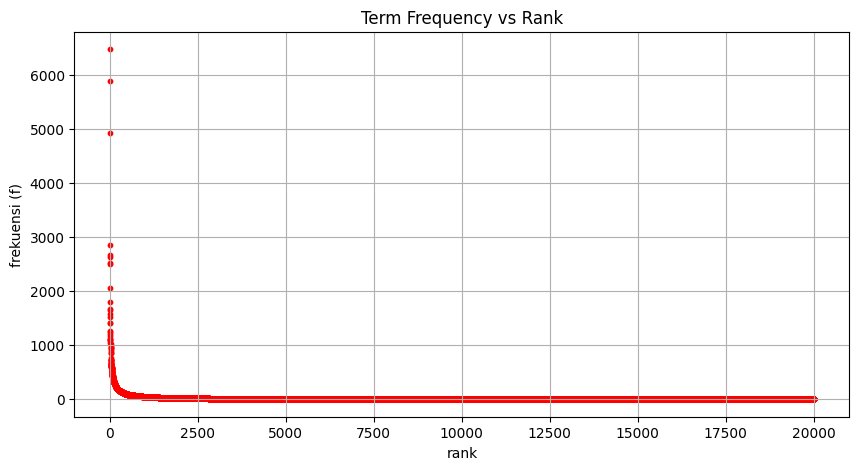

In [50]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title("Term Frequency vs Rank")
plt.xlabel("rank")
plt.ylabel("frekuensi (f)")

plt.grid(True)
plt.show()